## BREAST CANCER PREDICTION ##

### Data Source ##

Breast Cancer Wisconsin (Diagnostic)\
Data Set Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Note:** Dataset and attribute description can be found on the link


### Objective ##
Generate a classification model (Logistics Regression, K-Nearest Neighbor, and Support Vector Machine) and determine which model is the best for the problem. Make sure to perform the necessary data cleaning steps (scaling, splitting, correlation, etc.) before generating the model. 

### Method ###

  - Analyze columns (remove not needed columns)
  - Level the response variable (the count of 'yes' should match the count of 'no')
  - Split the dataset into train and test datasets. Use 70% on the train dataset and 30% to the test dataset
  - Inspect the variables range, mean, and standard deviation to determine whether scaling is needed
  - Generate Logistic Regression, make predictions, and assess model's accuracy
  - Generate K-Nearest Neighbors, make predictions, and assess model's accuracy
  - Generate Support Vector Machine, make predictions, and assess model's accuracy

### Analysis ###
  - There are 2 columns in the dataframe that are needed - id and unnamed:32. They are removed on the dataframe
  - There are 212 counts of benign which is labeled as 0 and 
  - There is a variance between the values of the response. There are 212 counts of benign/0 and 357 counts of malignant/1
  - Performed down scaling to match the counts of the responses
  - There is a significant difference between the variables mean, range and standard deviation. Performed data set scaling
  - Logisitcs Regression has an accuracy of 96%
    - True Positive - 62
    - True Negative - 61
    - False Positive - 2
    - False Negative - 3
  - K-Nearest Neighbors has an accuracy of 
    - True Positive - 62
    - True Negative - 60
    - False Positive - 3
    - False Negative - 3
  - Support Vector Machine has an accuracy of 
    - True Positive - 62
    - True Negative - 60
    - False Positive - 3
    - False Negative - 3

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
#The code is used to ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#Importing Dataset
df = pd.read_csv('BreastCancer.csv')

In [4]:
#Inspecting columns and first 5 rows
print('first 5 rows')
display(df.head()) #last column is not needed (Unnamed:32). Hence, should be deleted in the df

first 5 rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Analyzing the df
df.info()
#There are two columns that are not needed: id and unnamed: 32
#Removing those columns
#Also, all columns are non-null which is good
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.head() #df with only needed columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Diagnosis has value of either M (malignant) or B (benign)
print('Unique values of diagnosis:', df['diagnosis'].unique())
print('M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous')

Unique values of diagnosis: ['M' 'B']
M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous


In [8]:
#For consistency analysis, we will use 0 for B (benign) and 1 for M (malignant)
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#There is a significant difference between the count of 0 (benign) and 1 (malignant)
print(df['diagnosis'].value_counts())
print(" ")
print("We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows")

0    357
1    212
Name: diagnosis, dtype: int64
 
We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows


In [10]:
#Splitting the dataframe. We will drop some rows of df_zero to match the number of rows of df_one
df_one = df[df['diagnosis'] == 1]
print('df_one:', df_one.shape)
df_zero = df[df['diagnosis'] == 0]
print('df_zero:', df_zero.shape)

df_one: (212, 31)
df_zero: (357, 31)


In [11]:
#Dropping rows of df_zero by random
df_zero = df_zero.sample(len(df_one), axis = 0)
df_zero

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
384,0,13.280,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,0.1617,...,14.24,17.37,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320
459,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,0.1621,...,10.67,36.92,68.03,349.9,0.1110,0.11090,0.07190,0.04866,0.2321,0.07211
304,0,11.460,18.16,73.59,403.1,0.08853,0.07694,0.033440,0.015020,0.1411,...,12.68,21.61,82.69,489.8,0.1144,0.17890,0.12260,0.05509,0.2208,0.07638
476,0,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858
89,0,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.070640,0.2116,...,16.34,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,12.760,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.18390,0.12550,0.08312,0.2744,0.07238
322,0,12.860,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,...,14.04,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
315,0,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
349,0,11.950,14.96,77.23,426.7,0.11580,0.12060,0.011710,0.017870,0.2459,...,12.81,17.72,83.09,496.2,0.1293,0.18850,0.03122,0.04766,0.3124,0.07590


In [12]:
#Concatenate df_one and df_zero
df_final = pd.concat([df_zero, df_one])
df_final

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
384,0,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,...,14.24,17.37,96.59,623.7,0.1166,0.2685,0.2866,0.09173,0.2736,0.07320
459,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
304,0,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,...,12.68,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638
476,0,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.2512,0.13390,0.2534,0.07858
89,0,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.25420,0.2929,0.09873
564,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115
565,1,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637
566,1,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.14180,0.2218,0.07820


<AxesSubplot:>

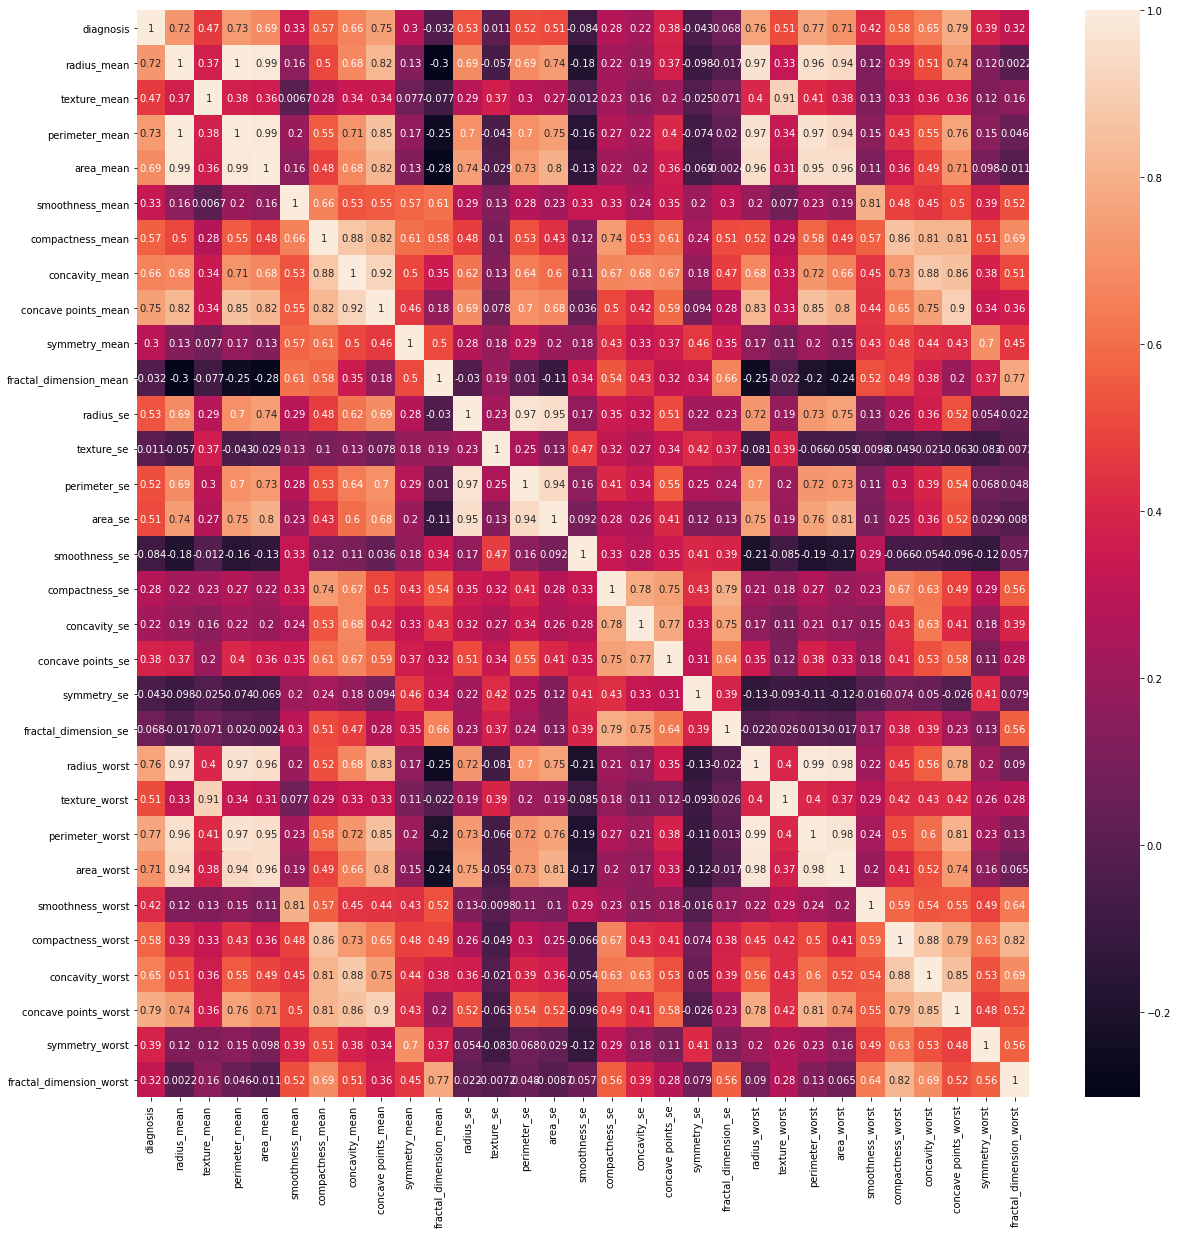

In [13]:
#Analyzing variables correlation
#There are variables that are highly correlated and there are not
#There are variables that are negatively and postively correlated
#Regarless, we will use all variables. We inspected correlation as we might need it if there are some issues with the result later
correlation = df_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)

In [14]:
#Setting response column to y 
#Setting predictor columns to x
y = 'diagnosis'
x = []
for i in df_final.columns:
    if i != y:
        x.append(i)
print('Here is the response column:', y)
print(' ')
print('Here are the predictors column:', x)

Here is the response column: diagnosis
 
Here are the predictors column: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [15]:
#df_x is the dataframe for predictor columns
df_x = df_final[x]
#df_y is the dataframe for response column
df_y = df_final[[y]]
display(df_x.head())
display(df_y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
384,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,0.05594,...,14.24,17.37,96.59,623.7,0.1166,0.2685,0.2866,0.09173,0.2736,0.07320
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
304,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,12.68,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.2512,0.13390,0.2534,0.07858
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.13970,0.3151,0.08473


,diagnosis
384,0
459,0
304,0
476,0
89,0


In [16]:
#Splitting the data into training set and test set
#70% to the training set and 30% to the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=60)
print('x_train dimension:', x_train.shape)
print('y_train dimension', y_train.shape)
print('x_test dimension', x_test.shape)
print('y_test dimension', y_test.shape)

x_train dimension: (296, 30)
y_train dimension (296, 1)
x_test dimension (128, 30)
y_test dimension (128, 1)


In [17]:
#The table below shows that there is a big variance on the mean and std. Example: smoothness and area
#We need to scale the data to elimate the said issue
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,14.799878,19.534459,96.723919,721.653041,0.098470,0.114192,0.104396,0.057664,0.184398,0.063046,...,17.269652,25.996081,114.291655,996.598649,0.135371,0.278516,0.304527,0.127802,0.297459,0.085553
std,3.766761,4.183906,25.994821,385.412098,0.014841,0.056162,0.084471,0.041144,0.028519,0.007545,...,5.227598,6.143761,36.304809,633.758998,0.023640,0.168807,0.209076,0.067929,0.064350,0.018794
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.164800,0.055250
25%,12.047500,16.587500,77.497500,447.150000,0.088440,0.072982,0.035195,0.023250,0.164400,0.057495,...,13.297500,21.375000,86.100000,544.050000,0.117200,0.151675,0.137075,0.069685,0.253875,0.073025
50%,13.865000,19.325000,90.370000,592.100000,0.097705,0.103150,0.090555,0.052770,0.182550,0.061670,...,15.995000,26.070000,105.950000,782.850000,0.136150,0.240200,0.269600,0.119500,0.287800,0.081145
75%,17.487500,22.085000,115.025000,952.475000,0.107650,0.147150,0.152350,0.086260,0.199350,0.066443,...,20.670000,30.372500,138.450000,1323.750000,0.150000,0.364200,0.429650,0.182000,0.326625,0.093603
max,28.110000,31.120000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.218400,0.937900,1.170000,0.290300,0.663800,0.173000


In [18]:
#Fitting scaler to the train dataset
scaler = StandardScaler()
scaler.fit(x_train)

#Scaling train and test dataset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Logistic Regression Model**

In [19]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [20]:
#Training the model and predicting using the model
#Using the 
test_pred_logreg = logreg.predict(x_test_scaled)
test_pred_logreg

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [21]:
#Computing the accuracy of the model
logistic_regression_accuracy = accuracy_score(y_test, test_pred_logreg)
print('The Logistic Regression accuracy is:', round(logistic_regression_accuracy,2))

The Logistic Regression accuracy is: 0.96


Logistic Regression Confusion Matrix
Accuracy is 0.96


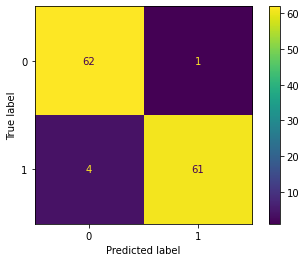

In [22]:
#Displaying the confusion Matrix
confusion_matrix(y_test, test_pred_logreg)
plot_confusion_matrix(logreg, x_test_scaled, y_test)
print('Logistic Regression Confusion Matrix')
print('Accuracy is', round(logistic_regression_accuracy,2))

**K Nearest Neighbors**

In [23]:
#KNN Model
#Setting the value of K
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
test_pred_knn = classifier.predict(x_test_scaled)
test_pred_knn

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [25]:
knn_accuracy = accuracy_score(y_test, test_pred_knn)
print('The K-Nearest Neighbors accuracy is:', round(knn_accuracy,2))

The K-Nearest Neighbors accuracy is: 0.95


K Nearest Neighbor Confusion Matrix
Accuracy is 0.95


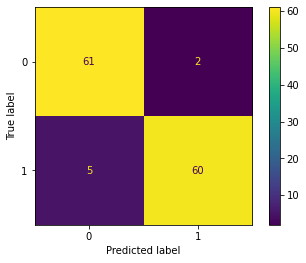

In [26]:
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('K Nearest Neighbor Confusion Matrix')
print('Accuracy is', round(knn_accuracy,2))

**Support Vector Machine**

In [27]:
#Generating SVM and setting parameters
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train_scaled, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [28]:
#Predicting using the SVM model
test_pred_svm=classifier.predict(x_test_scaled)
test_pred_svm

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [29]:
#Computing SVM Accuracy
svm_accuracy = accuracy_score(y_test, test_pred_svm)
print('The Support Vector Machine accuracy is:', round(svm_accuracy,2))

The Support Vector Machine accuracy is: 0.94


Support Vector Machine Confusion Matrix
Accuracy is 0.94


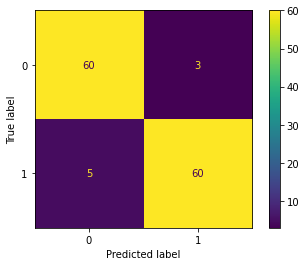

In [30]:
#Generating the SVM Confusion Matrix
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('Support Vector Machine Confusion Matrix')
print('Accuracy is', round(svm_accuracy,2))

**Summary of Results**

In [31]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]



In [32]:
#Logistic Regression TN,FP,FN and TP
logreg_TN = confusion_matrix(y_test, test_pred_logreg)[0][0]
logreg_FP = confusion_matrix(y_test, test_pred_logreg)[0][1]
logreg_FN = confusion_matrix(y_test, test_pred_logreg)[1][0]
logreg_TP = confusion_matrix(y_test, test_pred_logreg)[1][1]

In [33]:
#K Nearest Neighbors TN,FP,FN and TP
knn_TN = confusion_matrix(y_test, test_pred_knn)[0][0]
knn_FP = confusion_matrix(y_test, test_pred_knn)[0][1]
knn_FN = confusion_matrix(y_test, test_pred_knn)[1][0]
knn_TP = confusion_matrix(y_test, test_pred_knn)[1][1]

In [34]:
#SVM TN, FP, FN, and TP
svm_TN = confusion_matrix(y_test, test_pred_svm)[0][0]
svm_FP = confusion_matrix(y_test, test_pred_svm)[0][1]
svm_FN = confusion_matrix(y_test, test_pred_svm)[1][0]
svm_TP = confusion_matrix(y_test, test_pred_svm)[1][1]

In [35]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]
true_negative = [logreg_TN, knn_TN, svm_TN]
false_positive = [logreg_FP, knn_FP, svm_FP]
false_negative = [logreg_FN, knn_FN, svm_FN]
true_positive = [logreg_TP, logreg_TP, svm_TP]

data = {'Model': models, 'Accuracy': accuracy, 'True Positive': true_positive, 'True Negative': true_negative, 
       'False Positive': false_positive, 'False Negative': false_negative}
result_df = pd.DataFrame(data)
display(result_df)

,Model,Accuracy,True Positive,True Negative,False Positive,False Negative
0,Logistic Regression,0.960938,61,62,1,4
1,K Nearest Neighbors,0.945312,61,61,2,5
2,Support Vector Machine,0.937500,60,60,3,5


### Conclusion ###
There are 3 models generated on the analysis. The best model is Logistic Regression which has 96% accuracy. 